<a href="https://colab.research.google.com/github/atc857/linregblu365/blob/main/blu365_mod2_fgv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes do Grupo**:

André Telles Campos

Jeann Wilson C. Aguiar

Leandro Moura

Thálita



**Dicionário de dados**

|  Variável |  Descrição |
|---|---|
|datadisparo   |  Data do disparo de SMS |
|  ddd | ddd do telefone para o qual o SMS foi enviado  |
| sms_entregue  | quantidade histórica de SMSs com status de "entregue" para esse número  |
| sms_enviado  | quantidade histórica de SMSs com status de "enviado" para esse número  |
| sms_naoentregue  | quantidade histórica de SMSs com status de "não entregue" para esse número  |
| sms_rejeitado  | quantidade histórica de SMSs com status de "rejeitado" para esse número  |
| sms_invalido  | quantidade histórica de SMSs com status de "invalido" para esse número  |
| data_atraso  | data de atraso da dívida  |
| valor  | valor total da dívida em atraso  |
| operadora  | operadora do celular do inadimplente  |
| qtd_hist_acessos  | quantidade histórica de acessos da pessoa na plataforma BLU  |
| data_maisrecente_acesso  | data do acesso mais recente  |
| data_maisantiga_acesso  | data do acesso mais antigo  |
| sms_total_tent  | total histórico de tentativas de envio de SMSs para o número  |
| idade  | idade  |
| genero  | genero  |
| compradoronline  | índice de A (mais alto) a H indicando se a pessoa tem costume de comprar online |
| vendedoronline  | índice de A (mais alto) a H indicando se a pessoa tem costume de vender online  |
| utilizacaoweb  | índice de A (mais alto) a H indicando se a pessoa tem costume de usar a web  |
|rendaestimada | renda estimada da pessoa |
| acesso | variável a ser prevista: se a pessoa acessou ou não o site após o disparo |
| acordo | variável a ser prevista: se a pessoa fez ou não um acordo no site após o disparo |


In [1]:
# Instalação do pacote de análise estatística
!pip install pingouin --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.9 MB/s eta 0:00:00


In [4]:
# Importação das bibliotecas necessárias
import pingouin as pg
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Leitura do arquivo Excel
dir_file = "/content/drive/MyDrive/Colab Notebooks/FGV/blu365_dataset_recuperação_de_crédito.xlsx"
df = pd.read_excel(dir_file, sheet_name="dados")

In [5]:
df.head()

,datadisparo,ddd,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,data_atraso,valor,operadora,...,data_maisantiga_acesso,sms_total_tent,idade,genero,compradoronline,vendedoronline,utilizacaoweb,rendaestimada,acesso,acordo
0,2020-05-19,62,0,0,0,0,0,2019-05-24,126.21,Claro,...,NaT,0,22.0,M,H,H,H,NaN,0,0
1,2020-04-27,67,3,0,0,0,0,2017-04-14,244.29,Vivo,...,NaT,3,56.0,F,D,H,D,ATE 2 SM,0,0
2,2020-05-14,51,1,0,0,0,0,2019-09-04,51.00,Claro,...,NaT,1,45.0,M,B,H,B,ATE 2 SM,0,0
3,2020-05-13,51,0,0,0,0,0,2019-11-14,307.91,Tim,...,NaT,0,35.0,F,B,H,B,4 A 10 SM,0,0
4,2020-05-25,62,0,0,12,0,0,2017-03-14,154.12,Tim,...,NaT,12,43.0,F,A,H,A,NaN,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686383 entries, 0 to 686382
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   datadisparo              686383 non-null  datetime64[ns]
 1   ddd                      686383 non-null  int64         
 2   sms_entregue             686383 non-null  int64         
 3   sms_enviado              686383 non-null  int64         
 4   sms_naoentregue          686383 non-null  int64         
 5   sms_rejeitado            686383 non-null  int64         
 6   sms_invalido             686383 non-null  int64         
 7   data_atraso              686383 non-null  datetime64[ns]
 8   valor                    686383 non-null  float64       
 9   operadora                686383 non-null  object        
 10  qtd_hist_acessos         686383 non-null  int64         
 11  data_maisrecente_acesso  77512 non-null   datetime64[ns]
 12  data_maisantiga_

In [7]:
# Verifica a quantidade de valores ausentes nas colunas
df.isnull().sum()

datadisparo                     0
ddd                             0
sms_entregue                    0
sms_enviado                     0
sms_naoentregue                 0
sms_rejeitado                   0
sms_invalido                    0
data_atraso                     0
valor                           0
operadora                       0
qtd_hist_acessos                0
data_maisrecente_acesso    608871
data_maisantiga_acesso     608871
sms_total_tent                  0
idade                        1735
genero                       1733
compradoronline              1733
vendedoronline               1733
utilizacaoweb                1733
rendaestimada              165900
acesso                          0
acordo                          0
dtype: int64

In [8]:
# Resumo das principais medidas estatísitcas do dataset
df.describe()

,ddd,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,valor,qtd_hist_acessos,sms_total_tent,idade,acesso,acordo
count,686383.000000,686383.000000,686383.000000,686383.000000,686383.000000,686383.0,686383.000000,686383.000000,686383.000000,684648.000000,686383.000000,686383.000000
mean,54.100716,2.225027,0.050928,0.938616,0.002046,0.0,268.770910,0.182840,3.208181,40.644479,0.027453,0.003374
std,11.441091,3.472402,0.649311,2.474068,0.185847,0.0,291.660576,0.655077,3.755364,14.697298,0.163398,0.057990
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.300000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,110.520000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.0,225.970000,0.000000,2.000000,38.000000,0.000000,0.000000
75%,62.000000,3.000000,0.000000,0.000000,0.000000,0.0,343.995000,0.000000,5.000000,49.000000,0.000000,0.000000
max,99.000000,23.000000,20.000000,22.000000,18.000000,0.0,61952.930000,20.000000,23.000000,136.000000,1.000000,1.000000


<ipython-input-9-d6e0f38d264e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


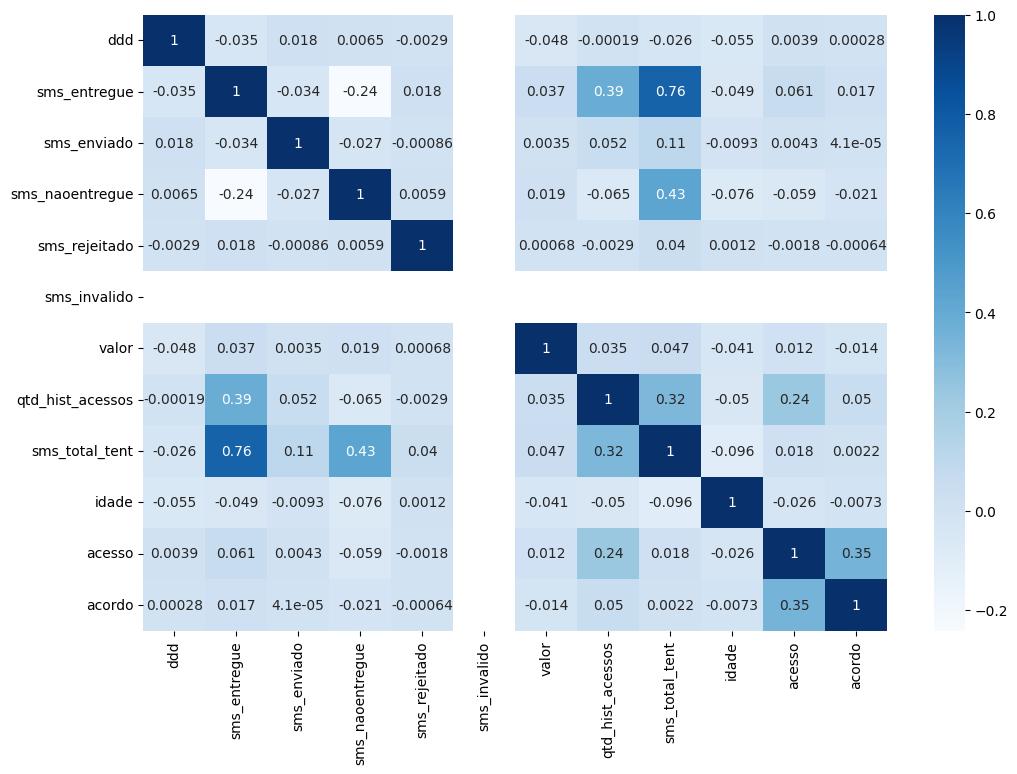

In [9]:
# Mapa de calor para a correlação entre variáveis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

# Manipulação de variáveis

Preparação da base de dados

In [10]:
# Cria coluna de dias de atraso da dívida até a data do disparo
df['dias_atraso'] = df['datadisparo'] - df['data_atraso']

In [11]:
df.head(10)

,datadisparo,ddd,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,data_atraso,valor,operadora,...,sms_total_tent,idade,genero,compradoronline,vendedoronline,utilizacaoweb,rendaestimada,acesso,acordo,dias_atraso
0,2020-05-19,62,0,0,0,0,0,2019-05-24,126.21,Claro,...,0,22.0,M,H,H,H,NaN,0,0,361 days
1,2020-04-27,67,3,0,0,0,0,2017-04-14,244.29,Vivo,...,3,56.0,F,D,H,D,ATE 2 SM,0,0,1109 days
2,2020-05-14,51,1,0,0,0,0,2019-09-04,51.00,Claro,...,1,45.0,M,B,H,B,ATE 2 SM,0,0,253 days
3,2020-05-13,51,0,0,0,0,0,2019-11-14,307.91,Tim,...,0,35.0,F,B,H,B,4 A 10 SM,0,0,181 days
4,2020-05-25,62,0,0,12,0,0,2017-03-14,154.12,Tim,...,12,43.0,F,A,H,A,NaN,0,0,1168 days
5,2020-05-19,48,0,0,1,0,0,2019-07-27,98.24,Oi,...,1,49.0,F,A,G,A,2 A 4 SM,0,0,297 days
6,2020-05-13,64,0,0,0,0,0,2019-10-15,71.16,Vivo,...,0,25.0,M,G,H,G,ATE 2 SM,0,0,211 days
7,2020-05-18,55,5,0,0,0,0,2017-02-14,321.13,Vivo,...,5,40.0,F,B,H,B,NaN,0,0,1189 days
8,2020-04-20,62,0,0,0,0,0,2019-03-28,291.40,Oi,...,0,30.0,F,A,H,A,ATE 2 SM,0,0,389 days
9,2020-05-21,43,12,0,0,0,0,2012-07-19,26.62,Tim,...,12,54.0,M,A,H,A,ATE 2 SM,0,0,2863 days


In [18]:
df['dias_atraso'].dtype

dtype('int64')

In [17]:
# Converte a coluna dias_atraso em inteiro
df['dias_atraso'] = df['dias_atraso'].dt.days

# Modelos de Regressão Linear

In [22]:
# definição de variáveis
Y = df['acesso']
X = df[['dias_atraso', 'sms_total_tent', 'valor', 'ddd']]

In [23]:
# vamos deixar o sklearn separar as variáveis em dois grupos treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
# cria o modelo e o treina com as variáveis separadas para treino
modelo2 = linear_model.LinearRegression()
modelo2.fit(X_train, y_train)

LinearRegression()

In [25]:
# Exibe os coeficientes do modelo na tela
a = modelo2.intercept_
b = modelo2.coef_
print(f"O intercepto é: {a:.4f}")
print(f"Os coeficientes angulares do modelo são: {b}")

O intercepto é: 0.0197
Os coeficientes angulares do modelo são: [1.08565607e-08 7.57114460e-04 6.48463830e-06 6.46612414e-05]


### Qualidade do modelo

In [26]:
# Para avaliar a qualidade do modelo usamos a biblioteca metrics do sklearn
# Valores preditos pelo modelo
yhat = modelo2.predict(X_test)

In [27]:
# Coeficiente de determinação do modelo
# varia de 0 a 1 e indica o poder de explicação do modelo
r_sq = metrics.r2_score(y_test,yhat)
print(f"Coeficiente de determinação r2 = {r_sq:.4f}")

Coeficiente de determinação r2 = 0.0005


In [28]:
# RMSE - root mean squared error
# O erro padrão ou desvio padrão do erro aleatório é uma importante métrica para comparar modelos
# Quanto menor o valor, melhor o modelo.
rmse = metrics.mean_squared_error(y_test,yhat,squared=False)
print(f"Desvio padrão s_e = {rmse:.4f}")

Desvio padrão s_e = 0.1643
